In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers,callbacks
from tensorflow.keras import callbacks
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
crops=pd.read_csv('./Crop_recommendation.csv')
df= crops.copy()

In [3]:
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
X= df.drop('label',axis=1)
y=df['label']

label_convertor={"rice":0,"maize":1,"chickpea":2,"kidneybeans":3,"pigeonpeas":4,"mothbeans":5,"mungbean":6,"blackgram":7,
                 "lentil":8,"pomegranate":9,"banana":10, "mango":11,"grapes":12,"watermelon":13,"muskmelon":14,"apple":15,
                 "orange":16,"papaya":17,"coconut":18,"cotton":19,"jute":20,"coffee":21}

new_y = [ele if ele not in label_convertor else label_convertor[ele] for ele in y]
new_y=np.array(new_y)

In [5]:
X_train, X_rem, y_train, y_rem = train_test_split(X, new_y, train_size=0.8, shuffle=True, random_state = 6)
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.5, shuffle=True,random_state= 4)

input_shape = [X_train.shape[1]]

In [6]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
2071,99,57,38,24.806250,82.092817,6.356296,156.361617
140,99,56,17,24.108592,73.131123,6.234330,71.075622
50,60,36,43,23.431219,83.063101,5.286204,219.904835
216,50,56,76,20.995022,19.860130,7.966605,73.507340
1892,3,9,35,26.916419,99.846716,6.318553,225.632366


In [7]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [8]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),    
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [9]:
model.compile(
    optimizer='Adam', # SGD is more sensitive to differences of scale
    loss='categorical_crossentropy',metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 7)                28        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              8192      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

Minimum Validation Loss: 0.0000


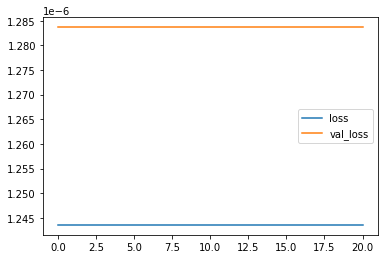

In [10]:
history = model.fit(
     X_train, y_train, validation_data=(X_val, y_val),
     batch_size=512,
     epochs=100,
     callbacks=[early_stopping],
     verbose=0)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [11]:
predictions=model.predict(X_test)
predictions=np.round_(predictions,decimals=0)
mean_absolute_error(y_test,predictions)

7/7 [==============================] - 0s 2ms/step


10.945454545454545

In [12]:
predictions=list(predictions)
j=0
for i in predictions:
  i=int(i[0])
  predictions[j]=i
  if(i<0):
    predictions[j]=0
  elif(i>21):
    predictions[j]=21
  j=j+1

In [13]:
#for i in predictions:
#  print(i)

In [14]:
reverse_dict = {v: k for k, v in label_convertor.items()}
#for i in reverse_dict:
#  print(i,reverse_dict[i])

In [15]:
labelled_predictions=[]
for i in predictions:
  labelled_predictions.append(reverse_dict[i])

for i in labelled_predictions:
  print(i)

rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice
rice


In [16]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [17]:
cm=confusion_matrix(y_true=y_test, y_pred=predictions)

In [18]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[ : ,np.newaxis]
    print("Normalized confusion matrix")

  else:
    print('Confusion matrix,without normalization')

  print(cm)

  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment="center",
             color="white" if cm[i,j]> thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix,without normalization
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

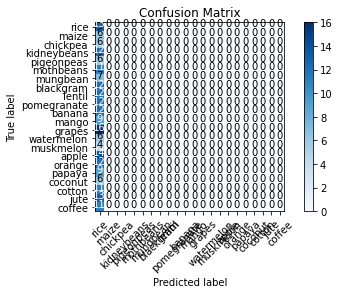

In [19]:
cm_plot_labels = list(label_convertor.keys())
plot_confusion_matrix(cm=cm, classes= cm_plot_labels ,title='Confusion Matrix')

In [20]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='weighted')

c:\Users\rithv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0034917355371900825, 0.05909090909090909, 0.006593835349200156, None)